In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation , Input , Conv2D, Flatten, Reshape, Conv2DTranspose,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train.shape

(60000,)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
X_train=np.reshape(x_train,(60000,28*28))

In [ ]:
df=pd.DataFrame(X_train)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['label']=y_train

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[(df['label'] == 1)]  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
16,0,0,0,0,0,0,0,0,0,53,146,127,115,111,130,129,100,147,169,190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,190,188,...,193,185,210,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,122,126,160,65,0,3,0,8,156,173,188,107,0,0,0,0,0,0,0,1
21,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,30,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,8,4,0,0,0,3,7,0,0,0,0,0,0,0,0,1
38,0,0,0,0,0,0,0,0,0,13,147,119,122,120,123,148,143,135,159,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,255,255,...,255,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,173,93,0,0,0,82,176,55,0,0,0,0,0,0,0,0,0,1
69,0,0,0,0,0,0,0,0,0,0,105,170,170,170,158,146,143,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,185,181,...,181,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,196,180,0,0,176,218,156,0,0,0,0,0,0,0,0,0,0,1
71,0,0,0,0,0,0,0,0,0,0,187,190,184,184,138,182,194,155,150,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,241,185,...,201,181,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,149,204,134,6,0,165,190,124,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59946,0,0,0,0,0,0,0,0,0,20,65,68,52,71,104,79,110,95,134,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,126,143,...,117,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,120,89,0,0,95,132,47,0,4,0,0,0,0,0,0,0,0,1
59956,0,0,0,0,0,0,0,17,179,139,133,153,111,131,159,185,179,185,185,181,213,23,0,0,0,0,0,0,0,0,0,0,0,0,0,23,231,197,193,209,...,215,207,205,215,21,0,0,0,0,0,0,0,0,0,0,0,0,0,57,229,201,213,145,0,0,1,0,0,163,175,179,191,0,0,0,0,0,0,0,1
59989,0,0,0,0,0,0,0,0,0,0,69,102,91,54,144,142,98,132,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,146,153,...,185,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,125,137,18,0,61,125,119,18,0,0,0,0,0,0,0,0,0,1
59991,0,0,0,0,0,0,0,0,0,0,153,156,146,170,167,155,164,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,215,...,161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,179,48,0,0,87,184,75,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_test=df.loc[df['label'].isin([0,1,2,3,4,6])]

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,15,131,87,95,97,106,95,115,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,252,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,134,124,0,0,160,80,0,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,15,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,225,218,21,...,208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,153,194,206,222,223,209,201,56,0,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,17,191,159,79,85,158,191,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,65,96,107,77,...,71,66,51,67,7,0,1,0,0,0,0,0,0,0,0,0,0,11,54,55,61,65,69,67,67,66,63,66,69,66,54,50,5,0,1,0,0,0,0,0


In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,22,88,188,172,132,125,141,199,143,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,20,131,199,206,196,202,...,0,0,0,0,0,224,197,123,0,0,0,0,0,0,0,141,151,76,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,133,167,73,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,0,0,0,0,0,0,0,0,0,0,153,156,146,170,167,155,164,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,215,...,161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,179,48,0,0,87,184,75,0,0,0,0,0,0,0,0,0,0,1
59993,0,0,0,0,0,0,0,0,0,0,0,0,13,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,187,...,98,117,58,183,238,98,0,0,0,0,0,0,0,0,0,0,82,149,95,0,0,0,0,0,0,0,0,0,0,0,0,128,163,62,0,0,0,0,0,2
59996,0,0,0,0,0,0,0,0,0,0,15,131,87,95,97,106,95,115,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,252,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,134,124,0,0,160,80,0,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,15,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,225,218,21,...,208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,153,194,206,222,223,209,201,56,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
df.loc[df['label'].isin([5])][:30]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,68,29,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,102,144,169,149,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,253,254,250,209,217,137,0,0,0,0,0,0,0,0,0,0,39,83,118,145,148,137,128,114,105,94,86,74,65,53,45,33,17,0,0,0,0,0,5
43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
df_test=df_test.append(df.loc[df['label'].isin([5])][:30], ignore_index = True) 
df_test=df_test.append(df.loc[df['label'].isin([7])][:30], ignore_index = True) 
df_test=df_test.append(df.loc[df['label'].isin([8])][:30], ignore_index = True) 
df_test=df_test.append(df.loc[df['label'].isin([9])][:30], ignore_index = True) 

In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,22,88,188,172,132,125,141,199,143,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,20,131,199,206,196,202,...,0,0,0,0,0,224,197,123,0,0,0,0,0,0,0,141,151,76,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,133,167,73,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
36116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,...,0,0,0,2,0,56,89,79,78,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
36117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
36118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [ ]:
df_test=df_test.drop(['label'],axis=1)

In [ ]:
x_train=df_test.to_numpy()

In [ ]:
x_train.shape

(36120, 784)

In [ ]:
x_train=np.reshape(x_train,(36120,28,28,1))

In [ ]:
x_train.shape

(36120, 28, 28, 1)

In [ ]:
x_train=x_train/255.0


In [ ]:
x_test=x_test/255.0

In [ ]:
inputs = Input(shape=(28,28,1), name='encoder_input')
x = Conv2D( filters=16, kernel_size=3,activation='relu', strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv2D( filters=32, kernel_size=3,activation='relu', strides=2, padding='same')(x)
x_shape=x.shape.as_list()
x = Flatten()(x)
enc_out = Dense(16)(x)
encoder = Model(inputs,enc_out,name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                25104     
Total params: 29,968
Trainable params: 29,936
Non-trainable params: 32
______________________________________________________

In [ ]:
x_shape

[None, 7, 7, 32]

In [ ]:
dec_input= Input(shape=(16), name='decoder_input')
x= Dense(x_shape[1]*x_shape[2]*x_shape[3])(dec_input)
x=Reshape((x_shape[1],x_shape[2],x_shape[3]))(x)
x = Conv2DTranspose(filters=32, kernel_size=3, activation='relu', strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(filters=16, kernel_size=3, activation='relu', strides=2, padding='same')(x)
output = Conv2DTranspose(filters=1, kernel_size=3, activation='sigmoid', padding='same')(x)
decoder = Model(dec_input,output,name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1568)              26656     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 28, 28, 16)        4624      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145 

In [ ]:
autoencoder = Model(inputs,decoder(encoder(inputs)),name='autodecoder')

In [ ]:
autoencoder.summary()

Model: "autodecoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                29968     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         40801     
Total params: 70,769
Trainable params: 70,673
Non-trainable params: 96
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
INIT_LR=1e-3
EPOCHS=30

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [ ]:
autoencoder.compile(loss=['mse'],
                    optimizer=opt,
                    metrics=['accuracy','mse'])

In [ ]:
#callback=tf.keras.callbacks.EarlyStopping(
#    monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto',
#    baseline=None, restore_best_weights=True)


In [ ]:
autoencoder.fit(x_train,x_train, epochs=EPOCHS)

Epoch 1/30
1129/1129 [==============================] - 5s 4ms/step - loss: 0.0168 - accuracy: 0.4642 - mse: 0.0168
Epoch 2/30
1129/1129 [==============================] - 5s 4ms/step - loss: 0.0101 - accuracy: 0.4666 - mse: 0.0101
Epoch 3/30
1129/1129 [==============================] - 5s 4ms/step - loss: 0.0093 - accuracy: 0.4667 - mse: 0.0093
Epoch 4/30
1129/1129 [==============================] - 5s 4ms/step - loss: 0.0090 - accuracy: 0.4668 - mse: 0.0090
Epoch 5/30
1129/1129 [==============================] - 5s 4ms/step - loss: 0.0087 - accuracy: 0.4669 - mse: 0.0087
Epoch 6/30
1129/1129 [==============================] - 5s 5ms/step - loss: 0.0085 - accuracy: 0.4669 - mse: 0.0085
Epoch 7/30
1129/1129 [==============================] - 5s 5ms/step - loss: 0.0083 - accuracy: 0.4669 - mse: 0.0083
Epoch 8/30
1129/1129 [==============================] - 5s 4ms/step - loss: 0.0082 - accuracy: 0.4670 - mse: 0.0082
Epoch 9/30
1129/1129 [==============================] - 5s 4ms/step - lo

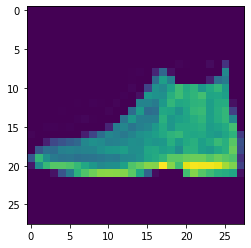

In [ ]:
plt.imshow(x_test[0])

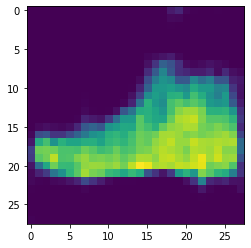

In [ ]:
y_pred=autoencoder.predict(x_test[0].reshape(1,28,28,1))
plt.imshow(y_pred.reshape(28,28))

In [ ]:
decoded = autoencoder.predict(x_train)
errors = []
# loop over all original images and their corresponding
# reconstructions
for (image, recon) in zip(x_train, decoded):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
	mse = np.mean((image - recon) ** 2)
	errors.append(mse)

In [ ]:
len(errors)

36120

In [ ]:
thresh = np.quantile(errors, 0.999)

In [ ]:
idxs = np.where(np.array(errors) >= thresh)[0]

In [ ]:
len(idxs)

37

In [ ]:
#np.where(np.array(errors) >= thresh)

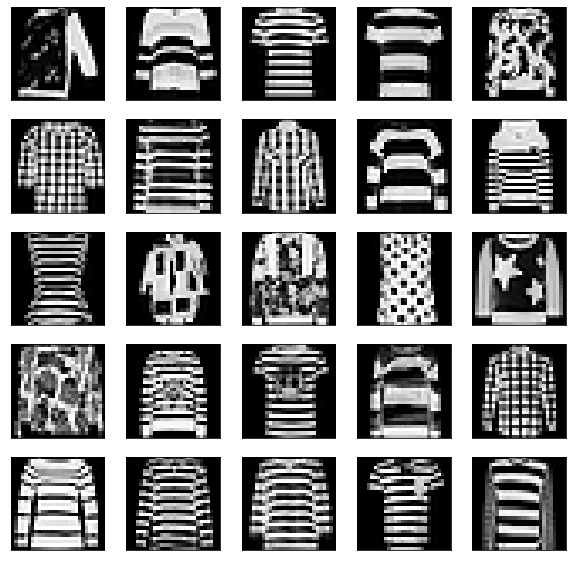

In [ ]:
plt.figure(figsize=(10,10))
for idx,i in enumerate(idxs[:25]):
    plt.subplot(5,5,idx+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    
plt.show()

https://www.pyimagesearch.com/2020/03/02/anomaly-detection-with-keras-tensorflow-and-deep-learning/